# Exploring Clinical Samples Positive for Clostridium Difficile #

Results for samples tested at Genova Diagnostics for * Clostridium difficile * from 2010 through January 2016 were extracted from SCC's SoftLab Laboratory Information System. 

The purpose of this notebook is threefold:

- ** Summarize ** the data by month in tabular and graphical form
- Demonstrate hypothesis testing using ** simulation ** (which provides a more intuitive approach to p-values and confidence intervals)
- Compare simulated results to ** classical statistical ** tests

There are innumerable questions which can be asked of these data. For simplicity, the question addressed here will be: ** Is the overall 2014 positivity different in a statistically significant way from the overall 2015 positivity? ** The analysis will be done using Python. 




In [64]:
!date

Sun Mar 13 18:29:03 EDT 2016


### Import and prepare data ###

In [66]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import pandas as pd
import seaborn as sns
import itertools
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

Populating the interactive namespace from numpy and matplotlib


In [6]:
All = pd.read_excel("CDIFF_Results/Total_CDIFF_2010_2016_RAW.xlsx")
All_CDF = All.drop(["Ward Name", "CDIFF", "CDIFZ", "ACDF"], axis=1).groupby(["Results", "Date"])\
.count().reset_index().pivot(index="Date", columns="Results")\
.resample('M', how='sum').fillna(0)["Order"]
All_CDF = All_CDF.assign(Percent = (All_CDF.Positive/(All_CDF.Negative+All_CDF.Positive)*100))
All_CDF = All_CDF.assign(Total = (All_CDF.Positive + All_CDF.Negative))

### Clostridium Difficile Testing Volume and Positivity Table ###

The summarized data reflect the number of samples tested for * Clostridium difficile * by month, from 2010 through January 2016. The company acquired a second clinical laboratory in late 2013, which accounts for the large increase in post-merger volume. 

In [53]:
All_CDF

Results,Negative,Positive,Percent,Total
Date,,,,
2010-01-31,386,6,1.530612,392
2010-02-28,472,2,0.421941,474
2010-03-31,545,7,1.268116,552
2010-04-30,559,10,1.757469,569
2010-05-31,511,6,1.160542,517
2010-06-30,529,7,1.305970,536
2010-07-31,503,9,1.757812,512
2010-08-31,511,2,0.389864,513
2010-09-30,500,5,0.990099,505


### Clostridium Difficile Testing Volume and Positivity Chart ###
The above data can also be summarized graphically.

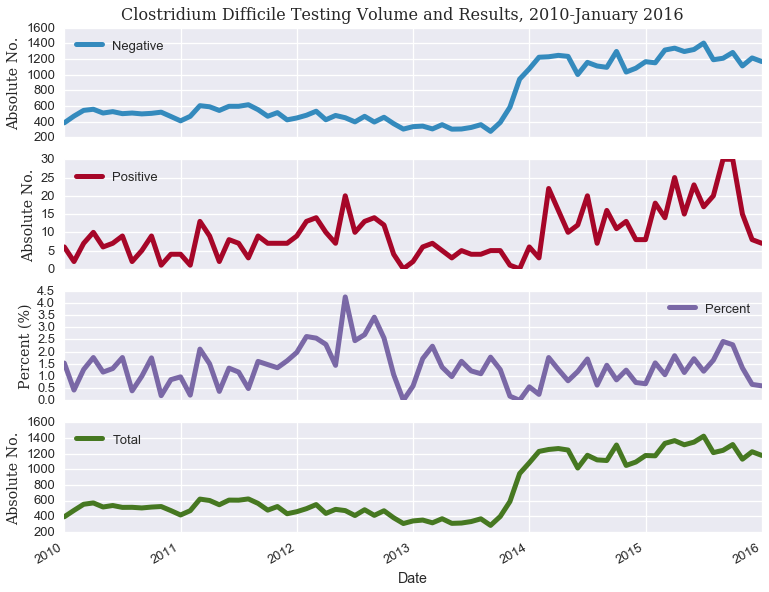

In [63]:
#palette = itertools.cycle(sns.color_palette())
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]
sns.set_context('talk')
sns.set_style("darkgrid")
ax = All_CDF.plot(subplots=True, lw=5, figsize=[12.5, 10], color=colors)
plt.suptitle("Clostridium Difficile Testing Volume and Results, 2010-January 2016", y=.93, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")
ax[3].set_ylabel("Absolute No.", family="serif")

### Hypothesis testing using simulation ###

Is the overall 2014 positivity different from the overall 2015 positivity? That is, was * Clostridium difficile * more, less, or equally prevalent in 2014 as compared to 2015? 

While this question can be addressed using classical statistical tests, such as the T-test or ANOVA, simulation using ** bootstrap sampling **(which is just random sampling from a distribution with replacement) allows for a more general statistical framework. Unlike classical statistical methods, simulation doesn't require knowledge of which specialized test is appropriate for a particular situation or which assumptions (e.g. normality of the data) a particular test is based on.

For the 2014 versus 2015 positivity question, the general idea is as follows. 

- Create two groups: one containing the monthly positivities from 2014, and one containing the monthly positivities from 2015

- Take 12 (to reflect the number of original data points; that is, one for each month) random samples with replacement from each group and calculate their means

- Repeat this step many times (say 10,000), storing the mean of each sample

- Plot a histogram of the resulting data

The overall purpose of a p-value is to ensure that differences in results aren't due to random variation in samples drawn from a population. This method of simulation actually introduces random variation into the results, so the extent of it can be viewed and analyzed. This is a much more graphical and intuitive way of quantifying sampling error compared to relying on a formula that spits out a p-value. 



### Split Data into 2014 and 2015 Groups, View Distribution

In [165]:
Monthly_Percent_2014 = All_CDF.reset_index()[48:60]["Percent"]
Monthly_Percent_2015 = All_CDF.reset_index()[60:72]["Percent"]
print("Overall Positivity of Samples from 2014 ± Standard Deviation: {0:.3f}% ± {1:.3f}%".format(Monthly_Percent_2014.mean(), Monthly_Percent_2014.std()))
print("Overall Positivity of Samples from 2015 ± Standard Deviation: {0:.3f}% ± {1:.3f}%".format(Monthly_Percent_2015.mean(), Monthly_Percent_2015.std()))

Overall Positivity of Samples from 2014 ± Standard Deviation: 1.032% ± 0.472%
Overall Positivity of Samples from 2015 ± Standard Deviation: 1.457% ± 0.559%


The 2014 positivity is 1.03% and the 2015 positivity is 1.46%, but is this difference significant?

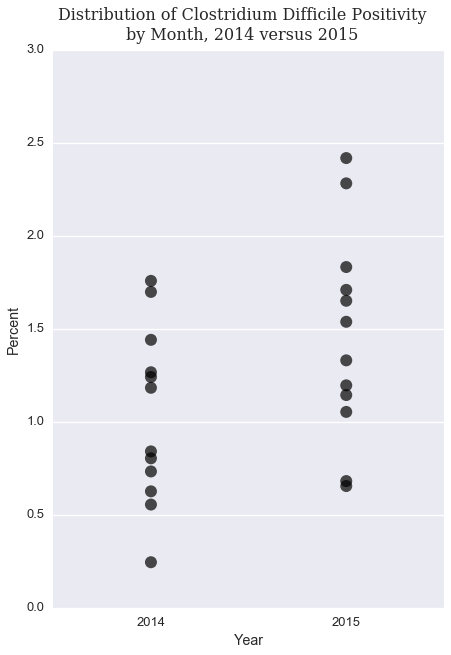

In [138]:
sns.set_style("darkgrid")
plt.figure(figsize=[7, 10])
Stacked_Combo = pd.concat([pd.DataFrame(Monthly_Percent_2014).assign(Year = 2014), pd.DataFrame(Monthly_Percent_2015).assign(Year = 2015)]).reset_index(drop=True)
sns.stripplot("Year", "Percent", data=Stacked_Combo, size=12, color="0", alpha = 0.7)
plt.suptitle("Distribution of Clostridium Difficile Positivity\nby Month, 2014 versus 2015", y=.96, size=16,family="serif")

### Simulate 10,000 Random Samples from Both Populations, Plot Histogram

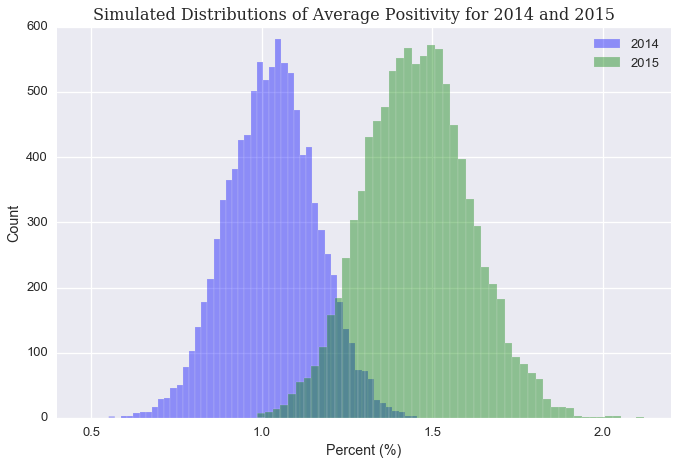

In [207]:
plt.figure(figsize=[11,7])
sns.distplot([np.random.choice(Monthly_Percent_2014, 12).mean() for i in range(10000)],kde=False, label="2014")
sns.distplot([np.random.choice(Monthly_Percent_2015, 12).mean() for i in range(10000)],kde=False, label="2015")
plt.xlabel("Percent (%)")
plt.ylabel("Count")
plt.suptitle("Simulated Distributions of Average Positivity for 2014 and 2015", y=.94, size=16,family="serif")
plt.legend()

Roughly, most of the possible 2014 positivities are between 0.7% and 1.4%, and most of the possible 2015 positivities are between 1.1% and 1.8%. There's some overlap but is it significant?

### Distribution of the Average Difference Between 2014 and 2015 ###
A distribution of the difference is obtained by subtracting a random sample mean from 2014 with one from 2015 10,000 times. 

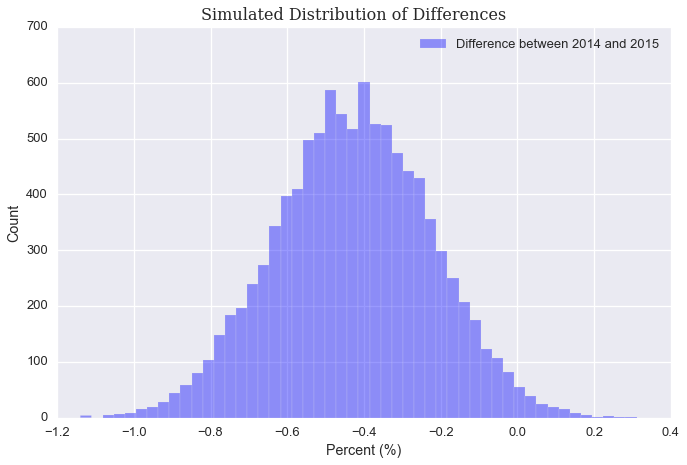

In [198]:
pair = zip([np.random.choice(Monthly_Percent_2014, 12).mean() for i in range(10000)], [np.random.choice(Monthly_Percent_2015, 12).mean() for i in range(10000)])
diff_of_pair = map(lambda x: x[0] - x[1], pair)
diff_of_pair = list(diff_of_pair)
plt.figure(figsize=[11,7])
sns.distplot(diff_of_pair, kde=False, label="Difference between 2014 and 2015")
plt.xlabel("Percent (%)")
plt.ylabel("Count")
plt.suptitle("Simulated Distribution of Differences", y=.94, size=16,family="serif")
plt.legend()

The distribution shows that most of the possible values of the difference in means are non-zero negative numbers (indicating the positivity in 2014 is less than in 2015). However, since zero is included in the distribution, it is possible that the 2014 and 2015 groups are just extreme samples from the same population.


### 95% Credible Interval ###

In [199]:
print("95% of the differences are between {0:0.3f}% and {1:0.3f}%".format(sort(diff_of_pair)[250], sort(diff_of_pair)[9750]))

95% of the differences are between -0.827% and -0.036%


In [214]:
diff_of_pair = np.asarray(diff_of_pair)
print("Only {0:.2f}% of the values are larger than or equal to zero".format(diff_of_pair[diff_of_pair >=0].size/diff_of_pair.size*100))


Only 1.59% of the values are larger than or equal to zero


### Classical Statistical Tests ###

Comparing 2014 and 2015 monthly positivities using the two-sided T-test for independent samples. 

In [209]:
t, p = stats.ttest_ind(Monthly_Percent_2014, Monthly_Percent_2015)

In [213]:
print("The t-statistic is {0:.4f} and the p-value is {1:.4f}".format(t,p))

The t-statistic is -2.0110 and the p-value is 0.0567


Therefore, since the p-value approaches a significant value of 0.05, but does not surpass it, the null hypothesis of identical average positivities ** cannot ** be rejected. That the value is very nearly significant reflects the simulation above in which the majority of differences in mean were less than zero. 

### 95% Confidence Interval

In [228]:
CI_2014 = 1.96*(Monthly_Percent_2014.std()/np.sqrt(12))
CI_2015 = 1.96*(Monthly_Percent_2015.std()/np.sqrt(12))
AVG_2014 = Monthly_Percent_2014.mean()
AVG_2015 = Monthly_Percent_2015.mean()

In [229]:
print("The 95% Confidence Interval for 2014 is {0:.3f}% to {1:.3f}%".format(AVG_2014-CI_2014, AVG_2014+CI_2014))
print("The 95% Confidence Interval for 2015 is {0:.3f}% to {1:.3f}%".format(AVG_2015-CI_2015, AVG_2015+CI_2015))

The 95% Confidence Interval for 2014 is 0.765% to 1.299%
The 95% Confidence Interval for 2015 is 1.140% to 1.773%


The overlapping confidence intervals further support the non-significant p-value, and agree with the ranges of the average positivity distributions estimated above.